# Capita Selecta project - IntruDTree
Team members: Daan Wesselman, Brian Baert


### Necessary imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
import random
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
random.seed(datetime.now().timestamp())

## Using same methods on different dataset
Sharafaldin, I., Lashkari, A. H., Ghorbani, A. A. (2018). Towards generating a new intrusion detection dataset and intrusion traffic characterization. Proceedings of the 4th international conference on information systems security and privacy, 108-116
[DOI](https://www.scitepress.org/papers/2018/66398/66398.pdf)



### Exploring the dataset
The dataset can be found via this [link](https://www.unb.ca/cic/datasets/ids-2017.html).

The dataset contains of 8 sub-datasets with different attack-types as label. All of them are much larger than the dataset used in the original paper of Sarker et al. This notebook analyses the infilteration-attacks subset: 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#from google.colab import files
#uploaded=files.upload()
#train = pd.read_csv('Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288602 entries, 0 to 288601
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             288602 non-null  int64  
 1    Flow Duration                288602 non-null  int64  
 2    Total Fwd Packets            288602 non-null  int64  
 3    Total Backward Packets       288602 non-null  int64  
 4   Total Length of Fwd Packets   288602 non-null  int64  
 5    Total Length of Bwd Packets  288602 non-null  int64  
 6    Fwd Packet Length Max        288602 non-null  int64  
 7    Fwd Packet Length Min        288602 non-null  int64  
 8    Fwd Packet Length Mean       288602 non-null  float64
 9    Fwd Packet Length Std        288602 non-null  float64
 10  Bwd Packet Length Max         288602 non-null  int64  
 11   Bwd Packet Length Min        288602 non-null  int64  
 12   Bwd Packet Length Mean       288602 non-nul

In [ ]:
train.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [ ]:
train[' Label'].value_counts()

BENIGN          288566
Infiltration        36
Name:  Label, dtype: int64

In [ ]:
train.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,288602.000000,2.886020e+05,288602.000000,288602.000000,2.886020e+05,2.886020e+05,288602.000000,288602.000000,288602.000000,288602.000000,...,288602.000000,288602.000000,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05
mean,8192.051115,8.974451e+06,6.229749,6.221596,5.662162e+02,6.162179e+03,140.848750,17.164105,41.673154,40.731899,...,3.435766,25.686859,6.137151e+04,4.154108e+04,1.325129e+05,3.810446e+04,2.609290e+06,1.210422e+05,2.701024e+06,2.484257e+06
std,17516.899862,2.753682e+07,74.587817,111.399547,2.605350e+04,1.897400e+05,435.712526,31.974350,118.941415,137.715423,...,49.746169,5.853203,5.195102e+05,3.778600e+05,9.265051e+05,4.408003e+05,1.068591e+07,1.637034e+06,1.099278e+07,1.051758e+07
min,0.000000,-2.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,5.900000e+01,2.000000,1.000000,4.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,443.000000,3.070000e+02,2.000000,2.000000,4.900000e+01,7.200000e+01,32.000000,2.000000,29.000000,0.000000,...,1.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3211.000000,1.005508e+05,3.000000,2.000000,9.500000e+01,2.460000e+02,51.000000,35.000000,46.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65533.000000,1.199999e+08,22673.000000,44553.000000,1.290000e+07,6.360000e+07,23360.000000,2065.000000,4317.097561,4467.113460,...,9130.000000,60.000000,6.520000e+07,3.810000e+07,7.910000e+07,6.520000e+07,1.200000e+08,7.530000e+07,1.200000e+08,1.200000e+08


## Removing some rows
The variables 'Flow Bytes/s' and ' Flow Packets/s' have rows with missing values. These instances are removed

In [ ]:
train = train[train['Flow Bytes/s'] != np.inf].reset_index(drop=True)
train = train[train[' Flow Packets/s'] != np.inf].reset_index(drop=True)
train.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,288395.000000,2.883950e+05,288395.000000,288395.000000,2.883950e+05,2.883950e+05,288395.000000,288395.000000,288395.000000,288395.000000,...,288395.000000,288395.000000,2.883950e+05,2.883950e+05,2.883950e+05,2.883950e+05,2.883950e+05,2.883950e+05,2.883950e+05,2.883950e+05
mean,8186.077737,8.980893e+06,6.232885,6.225957,5.666180e+02,6.166602e+03,140.946681,17.174448,41.700495,40.760294,...,3.437695,25.688029,6.141556e+04,4.157090e+04,1.326080e+05,3.813181e+04,2.611163e+06,1.211291e+05,2.702962e+06,2.486040e+06
std,17512.217898,2.754565e+07,74.614488,111.439400,2.606284e+04,1.898080e+05,435.853495,31.983446,118.979675,137.760705,...,49.763965,5.854359,5.196940e+05,3.779940e+05,9.268307e+05,4.409573e+05,1.068952e+07,1.637619e+06,1.099649e+07,1.052115e+07
min,0.000000,-2.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,5.900000e+01,2.000000,1.000000,4.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,443.000000,3.100000e+02,2.000000,2.000000,4.900000e+01,7.300000e+01,32.000000,2.000000,29.000000,0.000000,...,1.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3168.000000,1.007760e+05,3.000000,2.000000,9.500000e+01,2.460000e+02,51.000000,35.000000,46.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65533.000000,1.199999e+08,22673.000000,44553.000000,1.290000e+07,6.360000e+07,23360.000000,2065.000000,4317.097561,4467.113460,...,9130.000000,60.000000,6.520000e+07,3.810000e+07,7.910000e+07,6.520000e+07,1.200000e+08,7.530000e+07,1.200000e+08,1.200000e+08


<Axes: title={'center': 'Distribution of Flow Bytes/s'}>

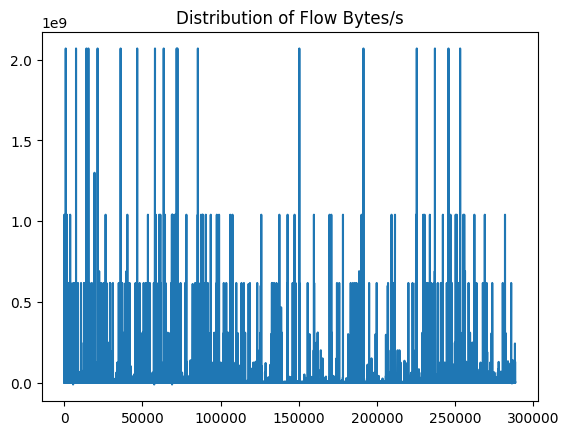

In [ ]:
train['Flow Bytes/s'].plot(title='Distribution of Flow Bytes/s')

### Cleaning up the dataset


1.   Feature encoding (not needed for this dataset, there are no categorical variables)
2.   Feature scaling



In [ ]:
y = train[' Label']
train.drop(' Label', axis='columns', inplace=True)

In [ ]:
len(y) - y.value_counts()['BENIGN']

36

In [ ]:
X = train

In [ ]:
scaler = StandardScaler()
for col in X.columns:
  temp = np.array(X[col]).reshape(-1,1)
  temp_scaled = scaler.fit_transform(temp)
  X[col] = temp_scaled.flatten()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288395 entries, 0 to 288394
Data columns (total 78 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             288395 non-null  float64
 1    Flow Duration                288395 non-null  float64
 2    Total Fwd Packets            288395 non-null  float64
 3    Total Backward Packets       288395 non-null  float64
 4   Total Length of Fwd Packets   288395 non-null  float64
 5    Total Length of Bwd Packets  288395 non-null  float64
 6    Fwd Packet Length Max        288395 non-null  float64
 7    Fwd Packet Length Min        288395 non-null  float64
 8    Fwd Packet Length Mean       288395 non-null  float64
 9    Fwd Packet Length Std        288395 non-null  float64
 10  Bwd Packet Length Max         288395 non-null  float64
 11   Bwd Packet Length Min        288395 non-null  float64
 12   Bwd Packet Length Mean       288395 non-nul

Perform the Train-Test-Split on the entire dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(0,10000))

### Calculating feature importance and ranking

First attempt is a random Decision Tree Classifier

In [ ]:
FeatImportanceTree = DecisionTreeClassifier(criterion='gini', random_state=random.randint(0,10000))
FeatImportanceTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2488)

In [ ]:
importances = {}
importanceList = FeatImportanceTree.feature_importances_
for feat, value in enumerate(importanceList):
  importances[X_train.columns[feat]] = np.round(value, 5)
sort_importances = sorted(importances.items(), key=lambda k: k[1], reverse=True)
pprint.pprint(sort_importances)

[(' Destination Port', 0.26421),
 ('Total Length of Fwd Packets', 0.15552),
 (' Avg Bwd Segment Size', 0.10628),
 (' Fwd Packet Length Std', 0.07778),
 (' Packet Length Std', 0.06087),
 ('Flow Bytes/s', 0.05667),
 (' Bwd IAT Max', 0.05001),
 (' Fwd IAT Min', 0.04998),
 (' Active Min', 0.03374),
 ('Fwd IAT Total', 0.0333),
 ('Idle Mean', 0.03287),
 (' Avg Fwd Segment Size', 0.02778),
 (' Active Max', 0.02223),
 ('Init_Win_bytes_forward', 0.01667),
 (' Idle Std', 0.00528),
 ('Fwd Packets/s', 0.00319),
 (' Idle Max', 0.00301),
 (' Bwd IAT Std', 0.00041),
 (' act_data_pkt_fwd', 0.00014),
 (' Flow Duration', 7e-05),
 (' Total Fwd Packets', 0.0),
 (' Total Backward Packets', 0.0),
 (' Total Length of Bwd Packets', 0.0),
 (' Fwd Packet Length Max', 0.0),
 (' Fwd Packet Length Min', 0.0),
 (' Fwd Packet Length Mean', 0.0),
 ('Bwd Packet Length Max', 0.0),
 (' Bwd Packet Length Min', 0.0),
 (' Bwd Packet Length Mean', 0.0),
 (' Bwd Packet Length Std', 0.0),
 (' Flow Packets/s', 0.0),
 (' Flow I

second attempt is a Random Forest classifier (multiple decision trees in an ensemble)

In [ ]:
FeatImportanceForest = RandomForestClassifier(criterion='gini', random_state=random.randint(0,10000))
FeatImportanceForest.fit(X_train, y_train)

RandomForestClassifier(random_state=5718)

In [ ]:
importanceList = {}
importanceList = FeatImportanceForest.feature_importances_
for feat, value in enumerate(importanceList):
  importances[X_train.columns[feat]] = np.round(value, 5)
sort_importances = sorted(importances.items(), key=lambda k: k[1], reverse=True)
pprint.pprint(sort_importances)

[(' Destination Port', 0.06075),
 ('Total Length of Fwd Packets', 0.04642),
 (' Subflow Bwd Bytes', 0.04136),
 ('Bwd Packet Length Max', 0.03797),
 (' Bwd Packet Length Mean', 0.03697),
 (' Avg Bwd Segment Size', 0.03146),
 (' Total Length of Bwd Packets', 0.03102),
 (' Packet Length Mean', 0.02926),
 (' Subflow Fwd Bytes', 0.02916),
 (' Packet Length Std', 0.02522),
 (' Flow IAT Max', 0.02406),
 (' act_data_pkt_fwd', 0.02363),
 (' Fwd Packet Length Std', 0.0226),
 (' Fwd Packet Length Mean', 0.02203),
 (' Fwd IAT Min', 0.02203),
 (' Bwd IAT Min', 0.02182),
 (' Avg Fwd Segment Size', 0.02181),
 ('Init_Win_bytes_forward', 0.02072),
 (' Total Fwd Packets', 0.02044),
 (' Bwd IAT Max', 0.0203),
 (' Max Packet Length', 0.01982),
 (' Flow IAT Std', 0.01949),
 (' Average Packet Size', 0.01938),
 (' Init_Win_bytes_backward', 0.01595),
 (' Flow Duration', 0.01554),
 (' Active Min', 0.01552),
 (' Bwd Packet Length Std', 0.01437),
 ('Fwd IAT Total', 0.01357),
 ('Subflow Fwd Packets', 0.01317),
 (


In the paper the researchers chose all features with a value above $t=0.02$.

In [ ]:
#select important features
imp_feature_list = []
for feat in enumerate(sort_importances):
  if feat[1][1] > 0.02:
    imp_feature_list.append(feat[1][0])
pprint.pprint(imp_feature_list)

[' Destination Port',
 'Total Length of Fwd Packets',
 ' Subflow Bwd Bytes',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Mean',
 ' Avg Bwd Segment Size',
 ' Total Length of Bwd Packets',
 ' Packet Length Mean',
 ' Subflow Fwd Bytes',
 ' Packet Length Std',
 ' Flow IAT Max',
 ' act_data_pkt_fwd',
 ' Fwd Packet Length Std',
 ' Fwd Packet Length Mean',
 ' Fwd IAT Min',
 ' Bwd IAT Min',
 ' Avg Fwd Segment Size',
 'Init_Win_bytes_forward',
 ' Total Fwd Packets',
 ' Bwd IAT Max']


We see that the amount of importance features is slightly larger (15) than for the original dataset (14)

### Designing the decision tree

In [ ]:
IDT_DS_x = X_train[imp_feature_list]
IDTTree = DecisionTreeClassifier(criterion='gini', random_state=random.randint(0,10000))

In [ ]:
cross_val_score(IDTTree, IDT_DS_x, y_train, cv=10)

array([0.99995666, 0.9996966 , 1.        , 0.99986997, 0.99991331,
       0.99978329, 0.99978328, 0.99982662, 0.99991331, 0.99995666])

In [ ]:
IDTForest = RandomForestClassifier(criterion='gini', random_state=random.randint(0,10000))
IDTForest.fit(IDT_DS_x, y_train)

RandomForestClassifier(random_state=6542)

### Experimental results

### IntruDTree

Comparable good results as for original dataset

In [ ]:
y_pred = IDTForest.predict(X_test[imp_feature_list])
print("Accuracy of Random Forest:", accuracy_score(y_test, y_pred))
print("Precision of Random Forest:", precision_score(y_test, y_pred,pos_label='Infiltration'))
print("Recall of Random Forest:", recall_score(y_test, y_pred,pos_label='Infiltration'))
print("Fscore of Random Forest:", f1_score(y_test, y_pred,pos_label='Infiltration'))

Accuracy of Random Forest: 0.999982662667522
Precision of Random Forest: 1.0
Recall of Random Forest: 0.8333333333333334
Fscore of Random Forest: 0.9090909090909091


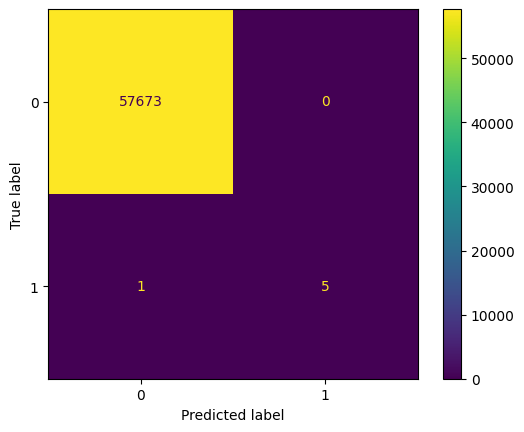

In [ ]:
confMatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confMatrix).plot()

In [ ]:
y_pred

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
traffic = {'BENIGN': 0, 'Infiltration': 1}
y_test_int = np.vectorize(traffic.get)(y_test)
y_pred_int = np.vectorize(traffic.get)(y_pred)

In [ ]:
y_test_int

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_int

array([0, 0, 0, ..., 0, 0, 0])

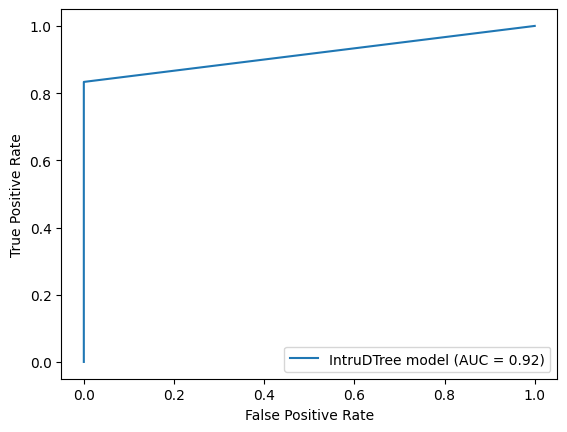

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_int, y_pred_int, pos_label=1)
roc_auc = auc(fpr,tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='IntruDTree model')
display.plot()
plt.show()

In [ ]:
print(roc_auc)

0.9166666666666667


### Logistic Regression

##  
There are issues with the multicollinearity of features, I suggest we set up the correlation matrix and decide wich features to skip or use a different solver


In [ ]:
corr = IDT_DS_x.corr()
corr.style.background_gradient(cmap='coolwarm')

,Destination Port,Total Length of Fwd Packets,Subflow Bwd Bytes,Bwd Packet Length Max,Bwd Packet Length Mean,Avg Bwd Segment Size,Total Length of Bwd Packets,Packet Length Mean,Subflow Fwd Bytes,Packet Length Std,Flow IAT Max,act_data_pkt_fwd,Fwd Packet Length Std,Fwd Packet Length Mean,Fwd IAT Min,Bwd IAT Min,Avg Fwd Segment Size,Init_Win_bytes_forward,Total Fwd Packets,Bwd IAT Max
Destination Port,1.000000,0.004420,-0.013953,-0.190311,-0.216660,-0.216660,-0.013949,-0.120840,0.004431,-0.157334,-0.118657,-0.022257,-0.046351,0.003282,-0.044836,-0.047443,0.003282,-0.113368,-0.023199,-0.106809
Total Length of Fwd Packets,0.004420,1.000000,0.011556,0.021039,0.015588,0.015588,0.011555,0.077740,1.000000,0.052959,0.016686,0.465993,0.075711,0.125857,-0.001642,-0.001650,0.125857,0.011579,0.307280,0.017157
Subflow Bwd Bytes,-0.013953,0.011556,1.000000,0.166153,0.172855,0.172855,1.000000,0.156928,0.011580,0.122343,0.040891,0.607610,0.013989,-0.000984,-0.002957,-0.003110,-0.000984,0.036674,0.932114,0.039519
Bwd Packet Length Max,-0.190311,0.021039,0.166153,1.000000,0.908591,0.908591,0.166121,0.770064,0.021084,0.916366,0.306362,0.168580,0.402288,0.162125,-0.024896,-0.026421,0.162125,0.424888,0.195166,0.295710
Bwd Packet Length Mean,-0.216660,0.015588,0.172855,0.908591,1.000000,1.000000,0.172818,0.829654,0.015623,0.878403,0.242454,0.167371,0.291160,0.125313,-0.008958,-0.009815,0.125313,0.374272,0.188242,0.224932
Avg Bwd Segment Size,-0.216660,0.015588,0.172855,0.908591,1.000000,1.000000,0.172818,0.829654,0.015623,0.878403,0.242454,0.167371,0.291160,0.125313,-0.008958,-0.009815,0.125313,0.374272,0.188242,0.224932
Total Length of Bwd Packets,-0.013949,0.011555,1.000000,0.166121,0.172818,0.172818,1.000000,0.156894,0.011579,0.122315,0.040880,0.607662,0.013984,-0.000985,-0.002956,-0.003110,-0.000985,0.036664,0.932140,0.039508
Packet Length Mean,-0.120840,0.077740,0.156928,0.770064,0.829654,0.829654,0.156894,1.000000,0.077881,0.888275,0.221767,0.169220,0.561910,0.607244,-0.007888,-0.008587,0.607244,0.304813,0.180470,0.212470
Subflow Fwd Bytes,0.004431,1.000000,0.011580,0.021084,0.015623,0.015623,0.011579,0.077881,1.000000,0.053058,0.016710,0.466129,0.075860,0.126069,-0.001645,-0.001653,0.126069,0.011605,0.307372,0.017181
Packet Length Std,-0.157334,0.052959,0.122343,0.916366,0.878403,0.878403,0.122315,0.888275,0.053058,1.000000,0.277589,0.145989,0.653073,0.460324,-0.028822,-0.030026,0.460324,0.444326,0.156489,0.263218


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = IDT_DS_x.columns
vif["vif_Factor"] = [variance_inflation_factor(IDT_DS_x.values, i) for i in range(IDT_DS_x.shape[1])]
vif = vif[vif.vif_Factor < 10]
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif_Factor
0,Destination Port,1.134822
11,act_data_pkt_fwd,2.741841
12,Fwd Packet Length Std,6.008042
14,Fwd IAT Min,6.267035
15,Bwd IAT Min,7.111196
17,Init_Win_bytes_forward,1.371973


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
import random
lrCV = LogisticRegressionCV(cv=10, random_state=random.randint(0,10000), max_iter=100, solver='lbfgs', verbose=True).fit(IDT_DS_x[vif.features], y_train)
#lrCV = LogisticRegressionCV(cv=10, random_state=random.randint(0,10000), max_iter=100, solver='newton-cholesky', verbose=True).fit(IDT_DS_x[vif.features], y_train)
# there are warnings
y_pred = lrCV.predict(X_test[vif.features])

In [ ]:
print("Accuracy of LR:", accuracy_score(y_test, y_pred))
print("Precision of LR:", precision_score(y_test, y_pred,pos_label='Infiltration', zero_division=0.0))
print("Recall of LR:", recall_score(y_test, y_pred,pos_label='Infiltration', zero_division=0.0))
print("Fscore of LR:", f1_score(y_test, y_pred,pos_label='Infiltration', zero_division=0.0))

Accuracy of LR: 0.9998959760051318
Precision of LR: 0.0
Recall of LR: 0.0
Fscore of LR: 0.0


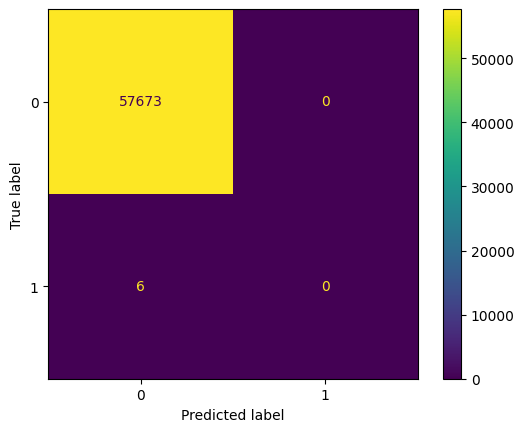

In [ ]:
confMatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confMatrix).plot()

The resulting accuracy (default returned score) is 0.97

### SVM

In [ ]:
from sklearn.svm import SVC
svCV = SVC(random_state=random.randint(0,10000), gamma='auto')
svCV.fit(IDT_DS_x, y_train)
y_pred = svCV.predict(X_test[imp_feature_list])

In [ ]:
print("Accuracy of SVM:", accuracy_score(y_test, y_pred))
print("Precision of SVM:", precision_score(y_test, y_pred,pos_label='Infiltration'))
print("Recall of SVM:", recall_score(y_test, y_pred,pos_label='Infiltration'))
print("Fscore of SVM", f1_score(y_test, y_pred,pos_label='Infiltration'))

Accuracy of SVM: 0.9999133133376099
Precision of SVM: 1.0
Recall of SVM: 0.16666666666666666
Fscore of SVM 0.2857142857142857


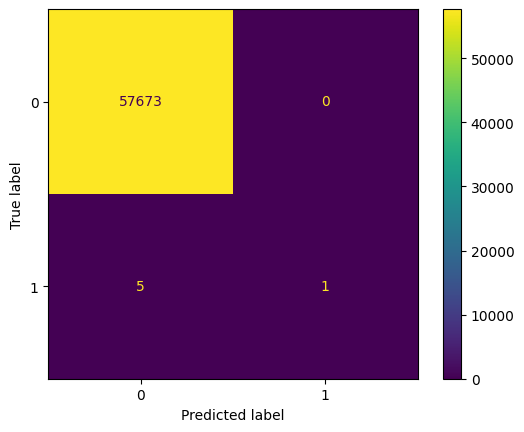

In [ ]:
confMatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confMatrix).plot()

The resulting accuracy (defeault return score) is 0.99, larger than the 0.95-score for the original dataset

### NB
We use GaussianNB and will define the prior probabilities of each class by investigating the number of occurrences of each class in the training dataset

In [ ]:
np.array(np.unique(y_train, return_counts=True)).T

array([['BENIGN', 230686],
       ['Infiltration', 30]], dtype=object)

In [ ]:
#the priors need to be adjusted to the output of the count function above
prior_anomaly = 230686/(230690+26)
prior_normal = 30/(230690+26)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB(priors=[prior_normal, prior_anomaly])
nb.fit(IDT_DS_x, y_train)
y_pred = nb.predict(X_test[imp_feature_list])

print("Accuracy of NB:", accuracy_score(y_test, y_pred))
print("Precision of NB:", precision_score(y_test, y_pred,pos_label='Infiltration'))
print("Recall of NB:", recall_score(y_test, y_pred,pos_label='Infiltration'))
print("Fscore of NB", f1_score(y_test, y_pred,pos_label='Infiltration'))

Accuracy of NB: 0.9593612926715096
Precision of NB: 0.002553191489361702
Recall of NB: 1.0
Fscore of NB 0.005093378607809847


The results of the Gaussian Naive Bayes approach is much larger than for the original dataset (0.6 versus 0.61)


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(IDT_DS_x,y_train)
y_pred = knc.predict(X_test[imp_feature_list])

print("Accuracy of KNN:", accuracy_score(y_test, y_pred))
print("Precision of KNN:", precision_score(y_test, y_pred,pos_label='Infiltration'))
print("Recall of KNN:", recall_score(y_test, y_pred,pos_label='Infiltration'))
print("Fscore of KNN", f1_score(y_test, y_pred,pos_label='Infiltration'))

Accuracy of KNN: 0.999982662667522
Precision of KNN: 1.0
Recall of KNN: 0.8333333333333334
Fscore of KNN 0.9090909090909091


Results are again better than for original dataset (0.991 versus 0.999)